In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("questions.csv")
df.shape

(404350, 6)

In [6]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
349415,349416,684565,684566,Why do you hate the military?,I'm underweight & don't put on weight easily. ...,0
105329,105330,208921,208922,How can I study whole day and concentrate?,How can I concentrate to study whole day and n...,0
132146,132147,261729,261730,"Which one is best for a fresher, Infosys or TC...","Between Infosys and TCS, what should one choos...",1
319764,319765,627368,627369,Do you have any tactics to fight stage fright?,How do I get rid of a very bad stage fright?,1
47247,47248,94072,94073,Do you follow your heart or brain?,Is India in my heart or brain?,0
31603,31604,62997,62998,What is copyscrn.com?,What is VRShared.com?,0
3074,3074,6148,6149,Is the use of the phrase 'pass out' to mean 'g...,"Which phrase ""You and me"" or ""You and I"" is us...",0
277442,277443,545492,545493,What can be the best solution for this problem?,Can a manuscript be sent for publication witho...,0
150068,150069,296882,296883,How could I check backlinks manually without a...,Backlink analyzing software/site?,0
82440,82441,163746,163747,What are some good online quizzing sites?,What are the best online quizz tools for busin...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404350 entries, 0 to 404349
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404350 non-null  int64 
 1   qid1          404350 non-null  int64 
 2   qid2          404350 non-null  int64 
 3   question1     404349 non-null  object
 4   question2     404348 non-null  object
 5   is_duplicate  404350 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255044
1    149306
Name: count, dtype: int64
is_duplicate
0    63.075059
1    36.924941
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

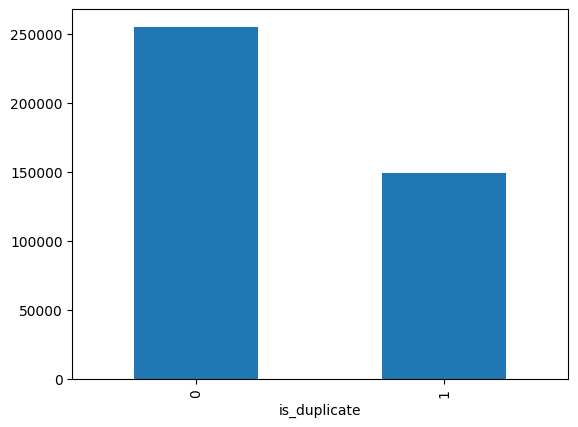

In [10]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789799
Number of questions getting repeated 13698


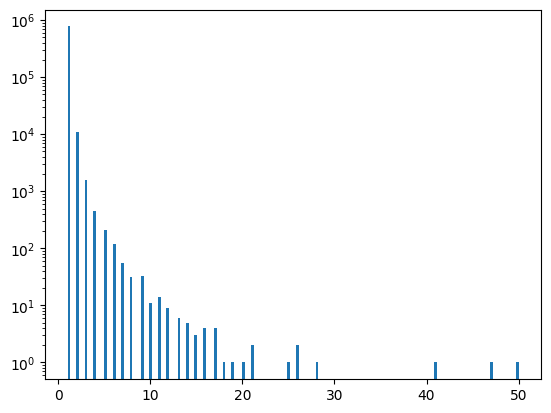

In [12]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()